In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


In [2]:
corona_dataset_csv = pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv")
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1272,1283,1284,1288,1288,1294,1298,1307,1312,1312
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,157,161,166,172,176,182,188,189,193,199
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1210,1223,1231,1239,1248,1261,1273,1282,1293,1302
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,52,54,55,58,59,62,64,67,70,75


In [3]:
corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1272,1283,1284,1288,1288,1294,1298,1307,1312,1312
1,NaN,Albania,0,0,0,0,0,0,0,0,...,157,161,166,172,176,182,188,189,193,199
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,1210,1223,1231,1239,1248,1261,1273,1282,1293,1302
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,0,0,0,0,0,0,0,0,...,52,54,55,58,59,62,64,67,70,75


In [4]:
corona_dataset_aggregated=corona_dataset_csv.groupby("Country/Region").sum()
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1272,1283,1284,1288,1288,1294,1298,1307,1312,1312
Albania,0,0,0,0,0,0,0,0,0,0,...,157,161,166,172,176,182,188,189,193,199
Algeria,0,0,0,0,0,0,0,0,0,0,...,1210,1223,1231,1239,1248,1261,1273,1282,1293,1302
Andorra,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
Angola,0,0,0,0,0,0,0,0,0,0,...,52,54,55,58,59,62,64,67,70,75


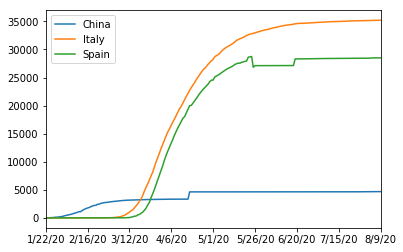

In [5]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
plt.legend()

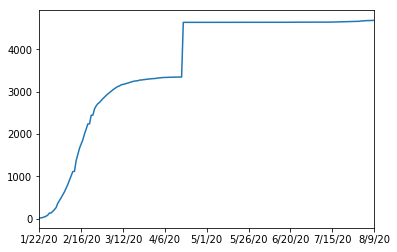

In [9]:
corona_dataset_aggregated.loc['China'].plot()

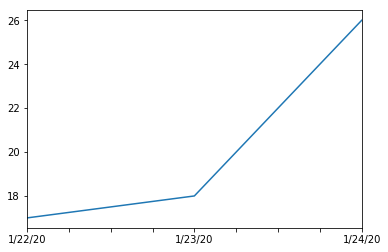

In [10]:
corona_dataset_aggregated.loc["China"][:3].plot()

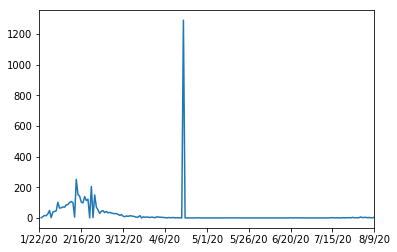

In [11]:
corona_dataset_aggregated.loc["China"].diff().plot()

In [12]:
countries= list(corona_dataset_aggregated.index)
max_death_rates = []
for c in countries:
    max_death_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_death_rates"]=max_death_rates

In [13]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,max_death_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1283,1284,1288,1288,1294,1298,1307,1312,1312,46.0
Albania,0,0,0,0,0,0,0,0,0,0,...,161,166,172,176,182,188,189,193,199,6.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,1223,1231,1239,1248,1261,1273,1282,1293,1302,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,54,55,58,59,62,64,67,70,75,6.0


In [15]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_death_rates"])
corona_data.head()

,max_death_rates
Country/Region,
Afghanistan,46.0
Albania,6.0
Algeria,30.0
Andorra,4.0
Angola,6.0


In [16]:
# The code was removed by Watson Studio for sharing.

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [17]:
happiness_report_csv.drop(["Overall rank","Score","Generosity","Perceptions of corruption"],axis=1,inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [18]:
happiness_report_csv.set_index("Country or region",inplace=True)
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [19]:
corona_data.head()

,max_death_rates
Country/Region,
Afghanistan,46.0
Albania,6.0
Algeria,30.0
Andorra,4.0
Angola,6.0


In [20]:
data=corona_data.join(happiness_report_csv, how="inner")
data.head()

,max_death_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,46.0,0.350,0.517,0.361,0.000
Albania,6.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,166.0,1.092,1.432,0.881,0.471
Armenia,19.0,0.850,1.055,0.815,0.283


In [21]:
data.corr()

,max_death_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_death_rates,1.000000,0.146030,0.118145,0.185031,0.096067
GDP per capita,0.146030,1.000000,0.757521,0.859431,0.394799
Social support,0.118145,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.185031,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.096067,0.394799,0.456317,0.423146,1.000000


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


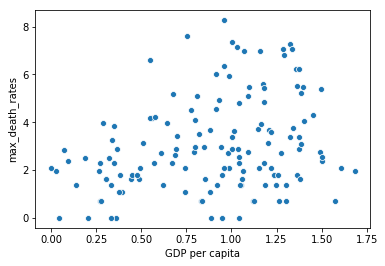

In [28]:
x=data["GDP per capita"]
y=data["max_death_rates"]
sns.scatterplot(x,np.log(y))

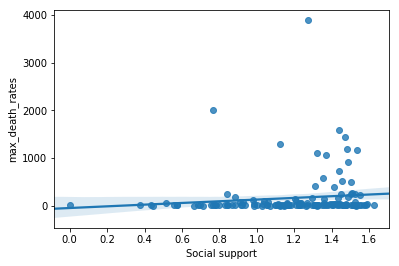

In [32]:
sns.regplot(x,y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


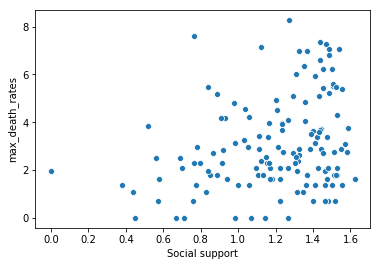

In [33]:
x=data["Social support"]
y=data["max_death_rates"]
sns.scatterplot(x,np.log(y))

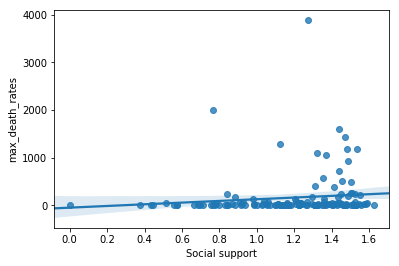

In [34]:
sns.regplot(x,y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


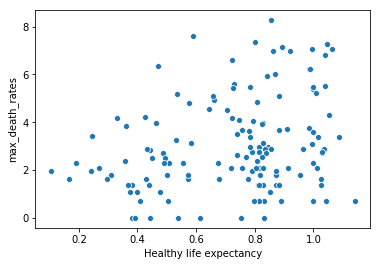

In [35]:
x=data["Healthy life expectancy"]
y=data["max_death_rates"]
sns.scatterplot(x,np.log(y))

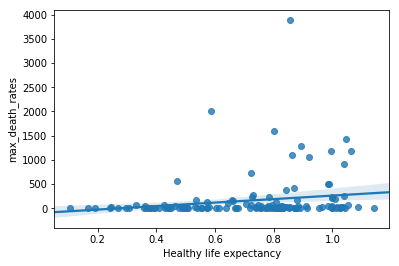

In [36]:
sns.regplot(x,y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


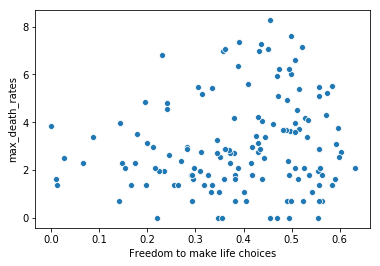

In [38]:
x=data["Freedom to make life choices"]
y=data["max_death_rates"]
sns.scatterplot(x,np.log(y))

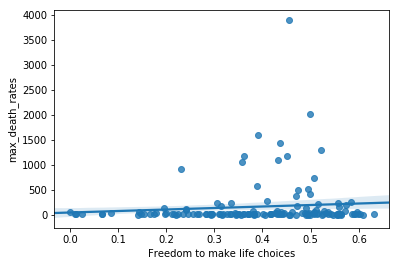

In [39]:
sns.regplot(x,y)